In [231]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from scipy import stats
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
file_path = '/content/drive/MyDrive/Diamond Price Prediction/data/gemstone.csv'
df=pd.read_csv(file_path)
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [189]:
df.shape

(193573, 11)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [191]:
df.isnull().sum()

,0
id,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0


In [192]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [193]:
#Dropping dimentionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(193563, 10)

In [194]:
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(193561, 10)

In [195]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [196]:
shade = sns.color_palette("Set2")

<ipython-input-197-0efaceb27d3e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="cut",y="price", data=df, palette=shade,scale= "count")
<ipython-input-197-0efaceb27d3e>:2: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.violinplot(x="cut",y="price", data=df, palette=shade,scale= "count")
<ipython-input-197-0efaceb27d3e>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="cut",y="price", data=df, palette=shade,scale= "count")


Text(0.5, 0, 'Cut')

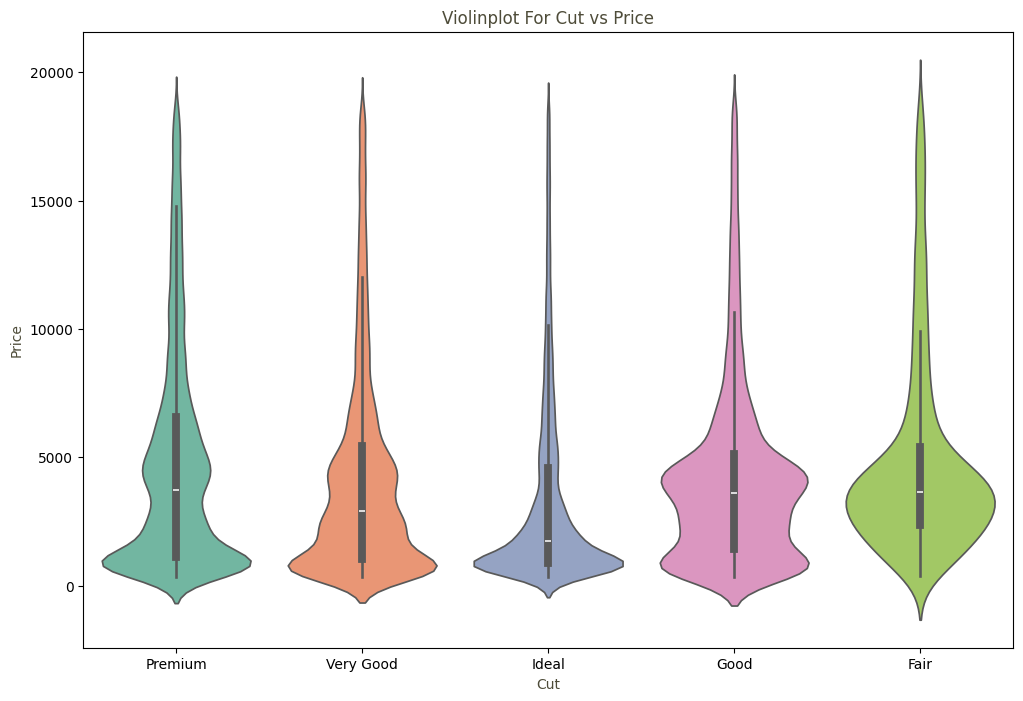

In [197]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price", data=df, palette=shade,scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

<ipython-input-198-0336eda3e4f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="color",y="price", data=df, palette=shade_1,scale= "count")
<ipython-input-198-0336eda3e4f0>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="color",y="price", data=df, palette=shade_1,scale= "count")


Text(0.5, 0, 'Color')

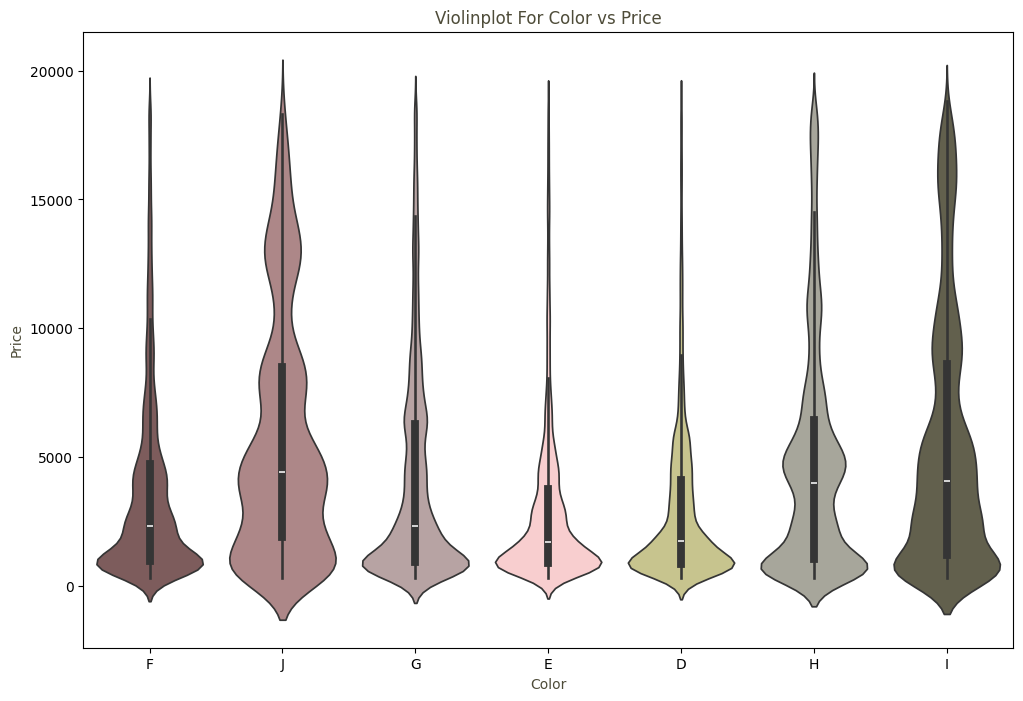

In [198]:
plt.figure(figsize=(12,8))
shade_1 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="color",y="price", data=df, palette=shade_1,scale= "count")
ax.set_title("Violinplot For Color vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Color", color="#4e4c39")

<ipython-input-199-d6117820a1c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="clarity",y="price", data=df, palette=shade_2,scale= "count")
<ipython-input-199-d6117820a1c8>:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  ax = sns.violinplot(x="clarity",y="price", data=df, palette=shade_2,scale= "count")


Text(0.5, 0, 'Clarity')

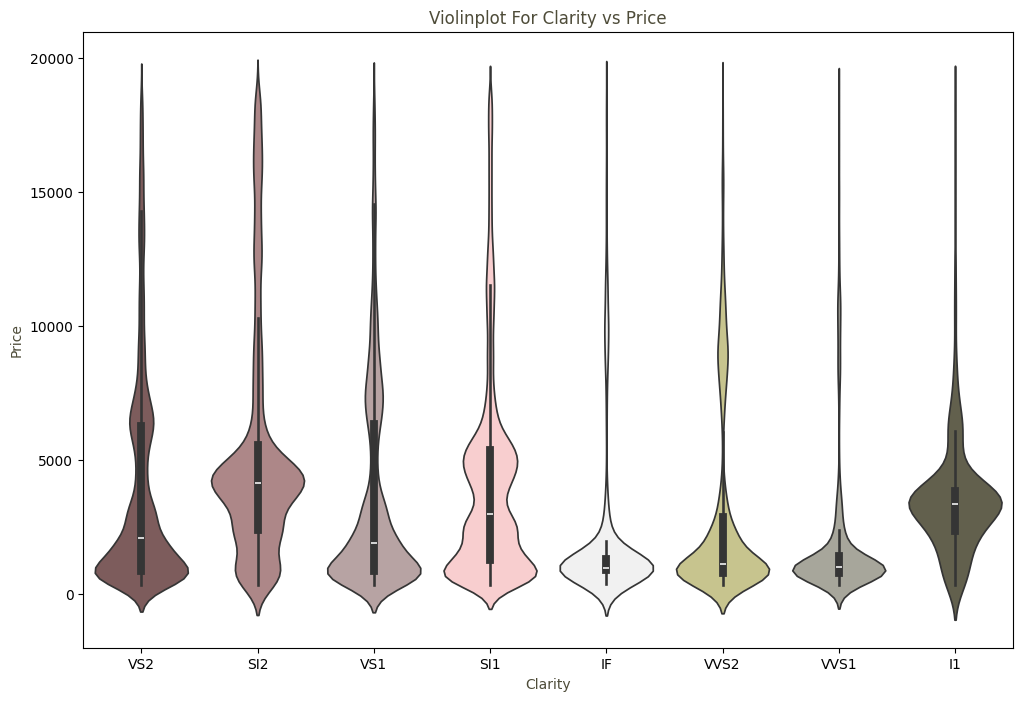

In [199]:
plt.figure(figsize=(12,8))
shade_2 = ["#835656","#b38182", "#baa0a0","#ffc7c8","#f1f1f1","#d0cd85", "#a9a799", "#65634a"]
ax = sns.violinplot(x="clarity",y="price", data=df, palette=shade_2,scale= "count")
ax.set_title("Violinplot For Clarity vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Clarity", color="#4e4c39")

Text(0, 0.5, 'Frequency')

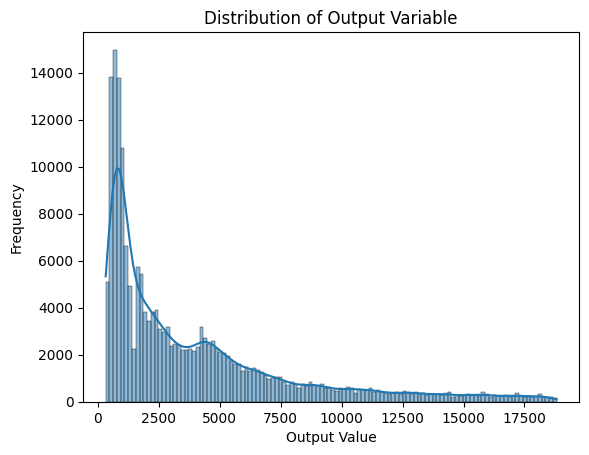

In [200]:
sns.histplot(df['price'], kde=True)  # kde=True adds a kernel density estimate line
plt.title('Distribution of Output Variable')
plt.xlabel('Output Value')
plt.ylabel('Frequency')

Optimal Lambda: -0.06594035036297503


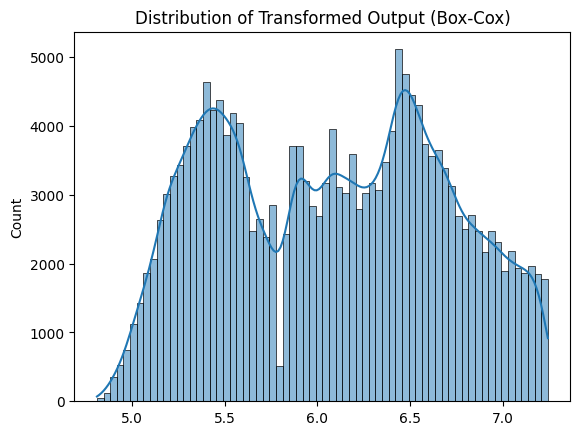

In [201]:
# Example data: Let's say 'output' is the variable you want to transform
data = df['price']  # Replace with your actual data

# Apply the Box-Cox transformation
# Adding 1 to avoid issues with zero values (since Box-Cox requires strictly positive data)
data_transformed, lambda_val = stats.boxcox(data + 1)

# Print the optimal lambda value
print(f'Optimal Lambda: {lambda_val}')

# Plot the transformed data to check if it looks more normally distributed
sns.histplot(data_transformed, kde=True)
plt.title('Distribution of Transformed Output (Box-Cox)')
plt.show()

In [202]:
df['price_transformed'] = (df['price']**lambda_val - 1) / lambda_val

Text(0, 0.5, 'Frequency')

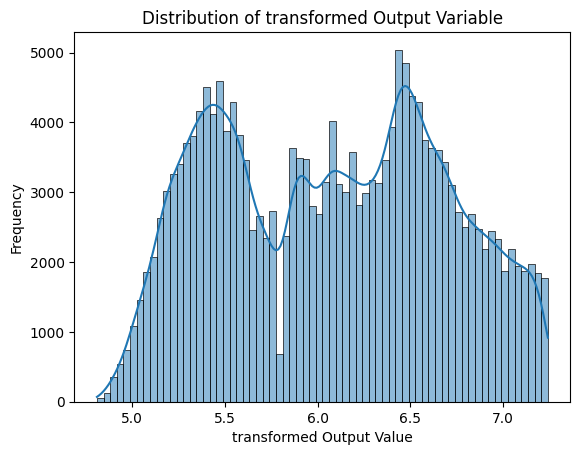

In [203]:
sns.histplot(df['price_transformed'], kde=True)  # kde=True adds a kernel density estimate line
plt.title('Distribution of transformed Output Variable')
plt.xlabel('transformed Output Value')
plt.ylabel('Frequency')

In [204]:
## Independent and dependent features
X = features = df.drop(columns=['price', "price_transformed"], axis = 1)
Y = df[['price_transformed']]

In [205]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77


In [206]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [207]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [208]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [209]:
X=pd.DataFrame(preprocessor.fit_transform(X),columns=preprocessor.get_feature_names_out())
#X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [210]:
# Assuming your DataFrame is named df
# Select only the numerical predictors
numerical_features = X[['num_pipeline__depth', 'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y', 'num_pipeline__z', "num_pipeline__carat",
                          "cat_pipeline__cut",	"cat_pipeline__color",	"cat_pipeline__clarity"]]

# Add a constant term for intercept (required by statsmodels)
V = sm.add_constant(numerical_features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = V.columns
vif_data['VIF'] = [variance_inflation_factor(V.values, i) for i in range(V.shape[1])]

# Display VIF results
print(vif_data)

                 feature          VIF
0                  const     1.000000
1    num_pipeline__depth    10.450478
2    num_pipeline__table     1.672834
3        num_pipeline__x   922.418449
4        num_pipeline__y   897.788023
5        num_pipeline__z  1046.833345
6    num_pipeline__carat    28.263638
7      cat_pipeline__cut     1.609797
8    cat_pipeline__color     1.150045
9  cat_pipeline__clarity     1.265259


In [211]:
# Select the variables for PCA
xyz_data = X[['num_pipeline__x', 'num_pipeline__y', 'num_pipeline__z', "num_pipeline__carat"]]

# Initialize PCA to reduce to 1 or 2 components (depending on how much variance you want to capture)
pca = PCA(n_components=4)  # Change to 1 if you want just one combined variable

# Fit and transform the data
xyz_pca = pca.fit_transform(xyz_data)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(xyz_pca, columns=['PCA1', 'PCA2', "PCA3", "PCA4"])

# Check the first few rows
print(pca_df.head())

# Display the explained variance ratio
print(pca.explained_variance_ratio_)


       PCA1      PCA2      PCA3      PCA4
0  2.959882  0.122330  0.039250 -0.043448
1  4.589097  0.459870  0.043949 -0.050081
2 -0.129328 -0.152735 -0.031793 -0.020734
3 -2.306704  0.148305 -0.009812 -0.012037
4  3.612946  0.197748  0.056752  0.018251
[9.91271475e-01 6.92845399e-03 1.60160158e-03 1.98469236e-04]


In [212]:
# Drop a single column
X = X.drop(["num_pipeline__x",	"num_pipeline__y",	"num_pipeline__z", "num_pipeline__carat"], axis=1)

In [213]:
X[['PC1', 'PC2', 'PC3', 'PC4']] = pca_df[['PCA1', 'PCA2', 'PCA3', 'PCA4']]

In [214]:
X.head()

,num_pipeline__depth,num_pipeline__table,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity,PC1,PC2,PC3,PC4
0,0.350747,0.402574,-0.132958,-0.317981,0.016537,2.959882,0.122330,0.039250,-0.043448
1,0.165846,0.402574,-1.138836,2.146457,-1.315227,4.589097,0.459870,0.043949,-0.050081
2,-0.573757,-0.118587,0.872921,0.298128,0.682419,-0.129328,-0.152735,-0.031793,-0.020734
3,-0.203956,-0.639749,0.872921,0.298128,0.682419,-2.306704,0.148305,-0.009812,-0.012037
4,0.720549,0.923736,-0.132958,0.298128,0.016537,3.612946,0.197748,0.056752,0.018251


In [215]:
# Assuming your DataFrame is named df
# Select only the numerical predictors
numerical_features = X[['num_pipeline__depth', 'num_pipeline__table', "PC1", "PC2", "PC3","PC4",
                          "cat_pipeline__cut",	"cat_pipeline__color",	"cat_pipeline__clarity"]]

# Add a constant term for intercept (required by statsmodels)
V = sm.add_constant(numerical_features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = V.columns
vif_data['VIF'] = [variance_inflation_factor(V.values, i) for i in range(V.shape[1])]

# Display VIF results
print(vif_data)

                 feature        VIF
0                  const   1.000000
1    num_pipeline__depth  10.450478
2    num_pipeline__table   1.672834
3                    PC1   1.349758
4                    PC2   1.061722
5                    PC3  10.015035
6                    PC4   1.026775
7      cat_pipeline__cut   1.609797
8    cat_pipeline__color   1.150045
9  cat_pipeline__clarity   1.265259


In [216]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=30)

In [217]:
#X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
#X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [218]:
X_train.head()

,num_pipeline__depth,num_pipeline__table,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity,PC1,PC2,PC3,PC4
169364,-0.758658,-0.118587,0.872921,-0.934091,1.348300,-1.995873,0.069462,-0.046957,0.032947
132405,-1.590713,-0.118587,0.872921,-1.550200,-0.649345,-2.359494,0.151459,-0.100694,-0.011309
177761,1.460153,-1.160910,-1.138836,-1.550200,-0.649345,-2.264627,0.126256,0.081383,-0.025375
36537,0.073396,-0.118587,-1.138836,0.914238,-0.649345,4.602259,0.501082,-0.003793,-0.043731
30646,0.535648,0.402574,-1.138836,-0.317981,-0.649345,0.725393,-0.142274,0.036613,-0.010472


In [219]:
n = len(X_test)
p = 9

In [220]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [221]:
## Train multiple models
## Model Ecaluation
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions

    y_pred=model.predict(X_test)

    mae, rmse, r2_square, =evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square)
    print("Adjusted R2 score", 1 - (1 - r2_square) * ((n-1 ) / (n - p - 1)))

    r2_list.append(r2_square)

    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 0.08310704705427012
MAE: 0.06181963166169039
R2 score 0.9813325864979602
Adjusted R2 score 0.9813299558850908


Lasso
Model Training Performance
RMSE: 0.5260129948486602
MAE: 0.45542894344200413
R2 score 0.2521725687185722
Adjusted R2 score 0.2520671848385494


Ridge
Model Training Performance
RMSE: 0.0830934993418891
MAE: 0.06182008748881452
R2 score 0.9813386721464016
Adjusted R2 score 0.981336042391122


Elasticnet
Model Training Performance
RMSE: 0.3301681127980663
MAE: 0.280375995985731
R2 score 0.7053688236369949
Adjusted R2 score 0.7053273041964903




In [222]:
X_train1 = sm.add_constant(X_train)
X_test1 = sm.add_constant(X_test)

In [224]:
# Reset index to align X_train and y_train
X_train1 = X_train1.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Fit the OLS model again
model = sm.OLS(y_train, X_train1).fit()

# Display summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      price_transformed   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 7.936e+05
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:51:32   Log-Likelihood:             1.4124e+05
No. Observations:              129685   AIC:                        -2.825e+05
Df Residuals:                  129675   BIC:                        -2.824e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.07

In [225]:
X_train = X_train.drop(columns=['num_pipeline__depth'], axis = 1)
X_test = X_test.drop(columns=['num_pipeline__depth'], axis = 1)

In [226]:
p = 8

In [227]:
## Train multiple models
## Model Ecaluation
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions

    y_pred=model.predict(X_test)

    mae, rmse, r2_square, =evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square)
    print("Adjusted R2 score", 1 - (1 - r2_square) * ((n-1 ) / (n - p - 1)))

    r2_list.append(r2_square)

    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 0.08312994094353843
MAE: 0.06181960223442795
R2 score 0.9813223002809048
Adjusted R2 score 0.981319960706512


Lasso
Model Training Performance
RMSE: 0.5260129948486602
MAE: 0.45542894344200413
R2 score 0.2521725687185722
Adjusted R2 score 0.252078895625265


Ridge
Model Training Performance
RMSE: 0.08312879274004148
MAE: 0.0618200088194535
R2 score 0.9813228162358492
Adjusted R2 score 0.9813204767260849


Elasticnet
Model Training Performance
RMSE: 0.3301681127980663
MAE: 0.280375995985731
R2 score 0.7053688236369949
Adjusted R2 score 0.7053319180455173




In [228]:
X_train1 = sm.add_constant(X_train)
X_test1 = sm.add_constant(X_test)

In [229]:
# Reset index to align X_train and y_train
X_train1 = X_train1.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Fit the OLS model again
model = sm.OLS(y_train, X_train1).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      price_transformed   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 8.928e+05
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:03:24   Log-Likelihood:             1.4124e+05
No. Observations:              129685   AIC:                        -2.825e+05
Df Residuals:                  129676   BIC:                        -2.824e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.07

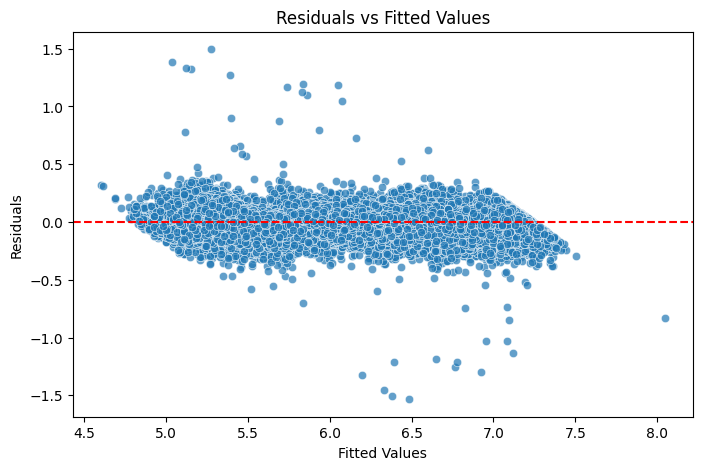

In [246]:
# Get residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Plot residuals vs fitted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


It mostly satisfies homoscedasticity, but the slight funnel shape might hint at mild heteroscedasticity.
To be sure, lets do Breusch-Pagan test to statistically confirm if heteroscedasticity is significant.

In [247]:
# Assuming you've already fitted your model
# model = sm.OLS(y_train, X_train).fit()

# Get residuals and exogenous variables (predictors)
residuals = model.resid
exog = model.model.exog

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, exog)

# Extract test statistics and p-values
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
result = dict(zip(labels, bp_test))

# Display the results
for key, value in result.items():
    print(f"{key}: {value}")


LM Statistic: 583.6565731530106
LM-Test p-value: 7.625854832569735e-121
F-Statistic: 73.2818185419154
F-Test p-value: 4.026941548626905e-121


In [234]:
weights = 1 / (model.fittedvalues ** 2)  # Example weights
wls_model = sm.WLS(y_train, X_train1, weights=weights).fit()
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:      price_transformed   R-squared:                       0.981
Model:                            WLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 8.445e+05
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:09:16   Log-Likelihood:             1.3783e+05
No. Observations:              129685   AIC:                        -2.756e+05
Df Residuals:                  129676   BIC:                        -2.756e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.07

In [235]:
# Assuming you've already fitted your model
# model = sm.OLS(y_train, X_train).fit()

# Get residuals and exogenous variables (predictors)
residuals = model.resid
exog = model.model.exog

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, exog)

# Extract test statistics and p-values
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
result = dict(zip(labels, bp_test))

# Display the results
for key, value in result.items():
    print(f"{key}: {value}")

LM Statistic: 583.6565731530106
LM-Test p-value: 7.625854832569735e-121
F-Statistic: 73.2818185419154
F-Test p-value: 4.026941548626905e-121


In [236]:
model_robust = model.get_robustcov_results(cov_type='HC3')
print(model_robust.summary())

                            OLS Regression Results                            
Dep. Variable:      price_transformed   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 7.608e+05
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:10:42   Log-Likelihood:             1.4124e+05
No. Observations:              129685   AIC:                        -2.825e+05
Df Residuals:                  129676   BIC:                        -2.824e+05
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.07

In [237]:
# Assuming you've already fitted your model
# model = sm.OLS(y_train, X_train).fit()

# Get residuals and exogenous variables (predictors)
residuals = model_robust.resid
exog = model_robust.model.exog

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, exog)

# Extract test statistics and p-values
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
result = dict(zip(labels, bp_test))

# Display the results
for key, value in result.items():
    print(f"{key}: {value}")

LM Statistic: 583.6565731530106
LM-Test p-value: 7.625854832569735e-121
F-Statistic: 73.2818185419154
F-Test p-value: 4.026941548626905e-121


In [238]:
gls_model = sm.GLS(y_train, X_train1).fit()
print(gls_model.summary())

                            GLS Regression Results                            
Dep. Variable:      price_transformed   R-squared:                       0.982
Model:                            GLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 8.928e+05
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:13:07   Log-Likelihood:             1.4124e+05
No. Observations:              129685   AIC:                        -2.825e+05
Df Residuals:                  129676   BIC:                        -2.824e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.07

In [239]:
# Assuming you've already fitted your model
# model = sm.OLS(y_train, X_train).fit()

# Get residuals and exogenous variables (predictors)
residuals = gls_model.resid
exog = gls_model.model.exog

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, exog)

# Extract test statistics and p-values
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
result = dict(zip(labels, bp_test))

# Display the results
for key, value in result.items():
    print(f"{key}: {value}")

LM Statistic: 583.6565731530106
LM-Test p-value: 7.625854832569735e-121
F-Statistic: 73.2818185419154
F-Test p-value: 4.026941548626905e-121


In [240]:


# Assuming 'model' is your fitted regression model
dw_statistic = durbin_watson(model.resid)
print(f'Durbin-Watson statistic: {dw_statistic}')


Durbin-Watson statistic: 2.0003181077434213


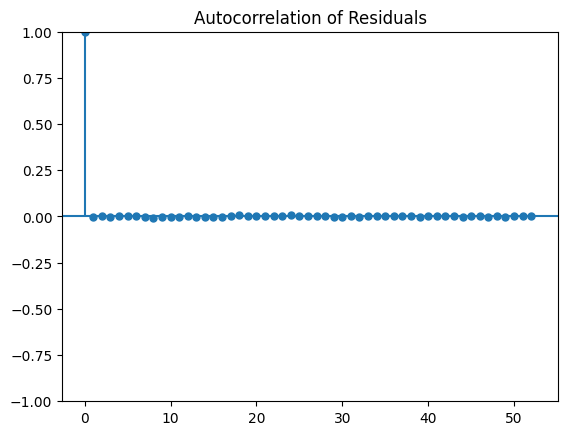

In [241]:


# Plot autocorrelation of residuals
plot_acf(model.resid)
plt.title('Autocorrelation of Residuals')
plt.show()


In [ ]:
# Durbin-Watson statistic: 2.0003181077434213, and plot showing there is not autocorrelation

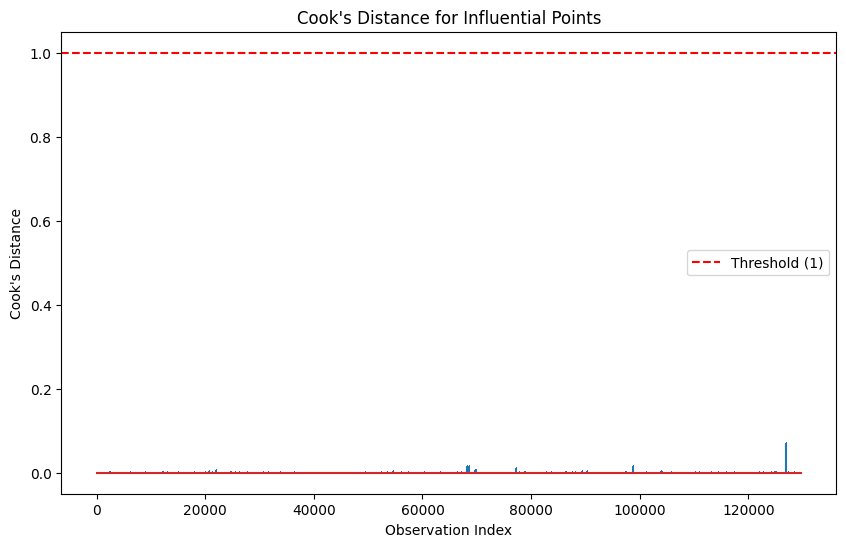

In [244]:
# Get influence measures from the model
influence = model.get_influence()
cooks_d, _ = influence.cooks_distance
# Plot Cook's Distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(y=1, color='r', linestyle='--', label='Threshold (1)')
plt.title("Cook's Distance for Influential Points")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

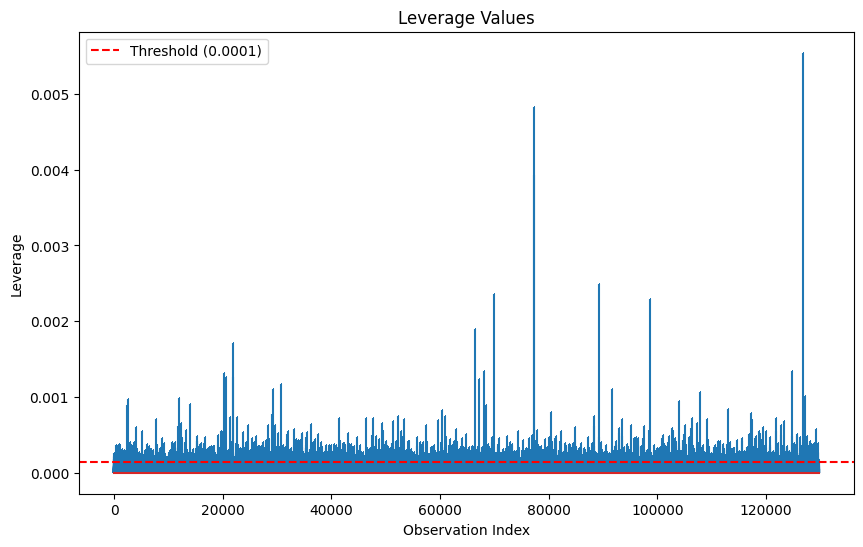

In [245]:
leverage = influence.hat_matrix_diag

# Threshold for high leverage
n = X_train1.shape[0]
p = X_train1.shape[1]
leverage_threshold = 2 * p / n

# Plot Leverage values
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(leverage)), leverage, markerfmt=",")
plt.axhline(y=leverage_threshold, color='r', linestyle='--', label=f'Threshold ({leverage_threshold:.4f})')
plt.title('Leverage Values')
plt.xlabel('Observation Index')
plt.ylabel('Leverage')
plt.legend()
plt.show()

In [ ]:
#there are leverage points but these are not influence points so we can ignore them.